In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datav3.csv')

In [42]:
question_map = {
    'Q1': 'gender',
    'Q2': 'age',
    'Q3': 'ethnic',
    'Q4': 'education',
    'Q7': 'AI_Support',  # Support for AI
    'Q8': 'AI_Trust', # Trust in AI
    'Q9': 'AI_Understanding', # Income level
    'Q10': 'AI_Impact',  # Perceived impact of AI on society
    'Q13': 'AI_Benefit',
    'Q14': 'AI_Efficiency',
    'Q15': 'AI_Optimism',  # People may be vulnerable to the risks of this technology now, but safety features are improving in ways that reduce their vulnerability
    'Q16': 'AI_Risk',
    'Q17': 'Transparency_Importance',  # Importance of transparency in AI
    'Q18': 'AI_Dependency', # society’s acceptance of it will increase
    'Q12': 'FOMO',  # Fear of missing out on AI advancements
    'Q19': 'income',
    'Q20': 'Party_ID',  # Political party identification
    'Q21': 'Ideology',  # Political ideology
    'Q22': 'religious',
    'Q24': 'State'  # State of residence
}
df = df.rename(columns=question_map)
df = df.dropna()

In [43]:
def party_label(code):
    if str(code) == '1':
        return 'Democrat'
    elif str(code) == '2':
        return 'Republican'
    elif str(code) == '3':
        return 'Independent'
    else:
        return 'Other'

df['Party_Label'] = df['Party_ID'].apply(party_label)

In [44]:
state_id_map = {
    1: 'Alabama', 2: 'Alaska', 3: 'Arizona', 4: 'Arkansas', 5: 'California', 6: 'Colorado',
    7: 'Connecticut', 8: 'Delaware', 9: 'Florida', 10: 'Georgia', 11: 'Hawaii', 12: 'Idaho',
    13: 'Illinois', 14: 'Indiana', 15: 'Iowa', 16: 'Kansas', 17: 'Kentucky', 18: 'Louisiana',
    19: 'Maine', 20: 'Maryland', 21: 'Massachusetts', 22: 'Michigan', 23: 'Minnesota', 24: 'Mississippi',
    25: 'Missouri', 26: 'Montana', 27: 'Nebraska', 28: 'Nevada', 29: 'New Hampshire', 30: 'New Jersey',
    31: 'New Mexico', 32: 'New York', 33: 'North Carolina', 34: 'North Dakota', 35: 'Ohio', 36: 'Oklahoma',
    37: 'Oregon', 38: 'Pennsylvania', 39: 'Rhode Island', 40: 'South Carolina', 41: 'South Dakota',
    42: 'Tennessee', 43: 'Texas', 44: 'Utah', 45: 'Vermont', 46: 'Virginia', 47: 'Washington',
    48: 'West Virginia', 49: 'Wisconsin', 50: 'Wyoming'
}
blue_states = ['California', 'New York', 'Illinois', 'New Jersey', 'Massachusetts', 'Maryland',
               'Hawaii', 'Connecticut', 'Rhode Island', 'Washington', 'Oregon', 'Vermont', 'Delaware']
red_states = ['Alabama', 'Arkansas', 'Idaho', 'Kansas', 'Kentucky', 'Louisiana', 'Mississippi',
              'Missouri', 'Montana', 'Nebraska', 'North Dakota', 'Oklahoma', 'South Carolina',
              'South Dakota', 'Tennessee', 'Utah', 'West Virginia', 'Wyoming']
swing_states = ['Arizona', 'Georgia', 'Michigan', 'Nevada', 'North Carolina', 'Pennsylvania', 'Wisconsin']

df['State_Name'] = df['State'].map(state_id_map)
df['State_Color'] = df['State_Name'].apply(lambda x:
    'Blue' if x in blue_states else 'Red' if x in red_states else 'Swing' if x in swing_states else 'Other')

In [45]:
df['Democrat'] = df['Party_Label'].apply(lambda x: 1 if x == 'Democrat' else 0)
df['Republican'] = df['Party_Label'].apply(lambda x: 1 if x == 'Republican' else 0)
df['Independent'] = df['Party_Label'].apply(lambda x: 1 if x == 'Independent' else 0)

In [46]:
df.describe()

,gender,age,ethnic,education,Q5,AI_Support,AI_Trust,AI_Understanding,FOMO,AI_Benefit,...,AI_Dependency,income,Party_ID,Ideology,religious,Q23,State,Democrat,Republican,Independent
count,1007.000000,1007.000000,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,...,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000
mean,1.512413,4.409136,5.16286,3.635551,1.003972,3.531281,3.377358,3.628600,3.357498,3.649454,...,3.842105,3.565045,2.075472,4.200596,4.323734,1.85005,24.445879,0.373386,0.268123,0.292949
std,0.504054,1.632010,1.40974,1.448674,0.062931,1.127447,1.151800,1.031847,1.155547,0.974454,...,0.913721,1.513192,1.023707,1.935716,3.414456,0.35720,14.864558,0.483944,0.443202,0.455342
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.00000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,1.000000,3.000000,1.000000,2.00000,9.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,6.00000,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,3.000000,2.000000,4.000000,3.000000,2.00000,25.000000,0.000000,0.000000,0.000000
75%,2.000000,6.000000,6.00000,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,3.000000,6.000000,9.000000,2.00000,38.000000,1.000000,1.000000,1.000000
max,3.000000,7.000000,6.00000,6.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,6.000000,5.000000,8.000000,10.000000,2.00000,50.000000,1.000000,1.000000,1.000000


/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_65721/567229220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Party_Label', y='AI_Support', data=df, palette='Set2')


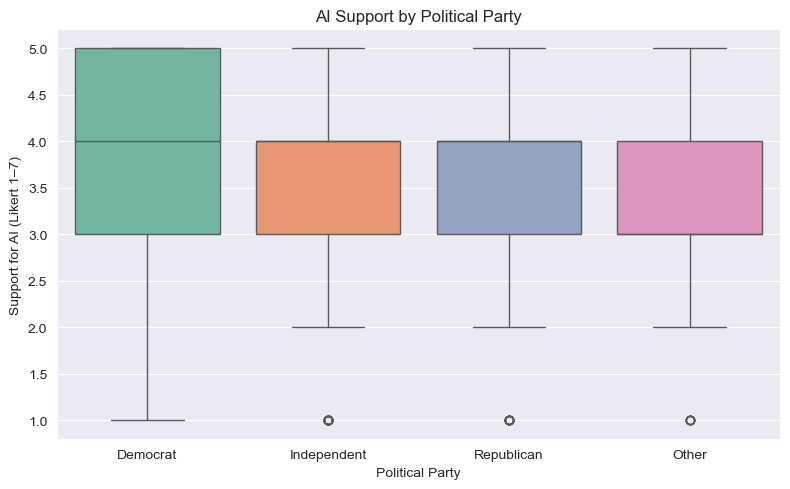

In [47]:
# Relationship between AI Support and Political Party
plt.figure(figsize=(8, 5))
sns.boxplot(x='Party_Label', y='AI_Support', data=df, palette='Set2')
plt.title('AI Support by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Support for AI (Likert 1–7)')
plt.tight_layout()
plt.show()

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_65721/2358383458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Party_Label', y='AI_Trust', data=df, palette='Set2')


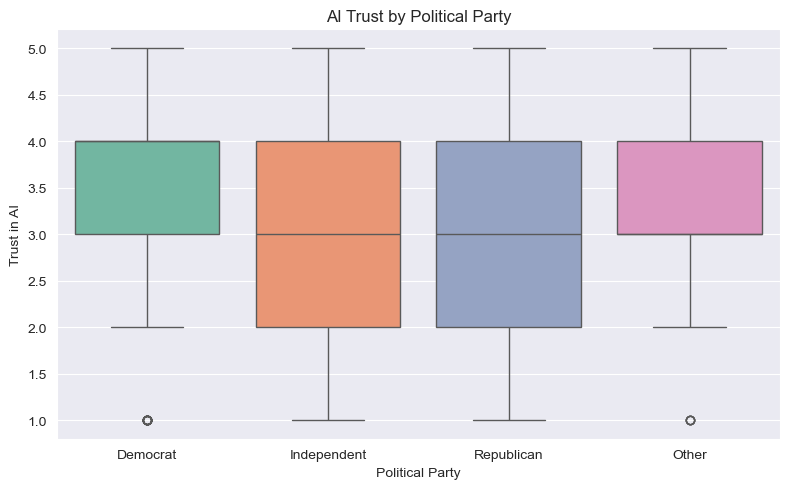

In [48]:
# Relationship between AI Trust and Political Party
plt.figure(figsize=(8, 5))
sns.boxplot(x='Party_Label', y='AI_Trust', data=df, palette='Set2')
plt.title('AI Trust by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Trust in AI')
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import ttest_ind

dems = df[df['Party_Label'] == 'Democrat']['AI_Support']
reps = df[df['Party_Label'] == 'Republican']['AI_Support']
inds = df[df['Party_Label'] == 'Independent']['AI_Support']

t_stat1, p_val1 = ttest_ind(dems, reps, nan_policy='omit')
t_stat2, p_val2 = ttest_ind(dems, inds, nan_policy='omit')
t_stat3, p_val3 = ttest_ind(reps, inds, nan_policy='omit')

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA model 1：AI support ~ party label
anova_model_1 = ols('AI_Support ~ Party_Label', data=df).fit()
anova_table_1 = sm.stats.anova_lm(anova_model_1, typ=2)
print("ANOVA results for AI Support by Party Label:")
print(anova_table_1)

# ANOVA model 2：AI trust ~ party label
anova_model_2 = ols('AI_Trust ~ Party_Label', data=df).fit()
anova_table_2 = sm.stats.anova_lm(anova_model_2, typ=2)
print("ANOVA results for AI Trust by Party Label:")
print(anova_table_2)

ANOVA results for AI Support by Party Label:
                  sum_sq      df         F    PR(>F)
Party_Label    34.953402     3.0  9.395386  0.000004
Residual     1243.811246  1003.0       NaN       NaN
ANOVA results for AI Trust by Party Label:
                  sum_sq      df         F    PR(>F)
Party_Label    36.107345     3.0  9.296821  0.000005
Residual     1298.496429  1003.0       NaN       NaN


In [60]:
# Regression: AI Support ~  Democrat + Ideology + age + gender + income + religious + education
import statsmodels.formula.api as smf
support_model_1 = smf.ols('AI_Support ~ Democrat + Ideology + age + gender + income + religious + education', data=df).fit()
print(support_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             AI_Support   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     14.01
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           2.09e-17
Time:                        21:03:28   Log-Likelihood:                -1502.0
No. Observations:                1007   AIC:                             3020.
Df Residuals:                     999   BIC:                             3059.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1083      0.222     18.524      0.0

In [61]:
# AI Support ~  Republican + Ideology + age + gender + income + religious + education
support_model_2 = smf.ols('AI_Support ~ Republican + Ideology + age + gender + income + religious + education', data=df).fit()
print(support_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             AI_Support   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     13.05
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           3.85e-16
Time:                        21:03:45   Log-Likelihood:                -1505.1
No. Observations:                1007   AIC:                             3026.
Df Residuals:                     999   BIC:                             3066.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3723      0.215     20.363      0.0

In [63]:
# Regression: AI Trust ~ Democrat + Ideology + age + gender + income + religious + education
trust_model_2 = smf.ols('AI_Trust ~ Democrat + Ideology + age + gender + income + religious + education', data=df).fit()
print(trust_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               AI_Trust   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     12.95
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           5.11e-16
Time:                        21:04:28   Log-Likelihood:                -1526.9
No. Observations:                1007   AIC:                             3070.
Df Residuals:                     999   BIC:                             3109.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0403      0.227     17.772      0.0

In [64]:
# AI Trust ~ Republican + Ideology + age + gender + income + religious + education
trust_model_2 = smf.ols('AI_Trust ~ Republican + Ideology + age + gender + income + religious + education', data=df).fit()
print(trust_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:               AI_Trust   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     11.96
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.03e-14
Time:                        21:04:29   Log-Likelihood:                -1530.2
No. Observations:                1007   AIC:                             3076.
Df Residuals:                     999   BIC:                             3116.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3265      0.220     19.655      0.0

In [73]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 2.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [77]:
import pingouin as pg

results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Benefit',
                                y='AI_Support',
                                alpha=0.05,
                                n_boot=5000)

print(results)

outcome_model = smf.ols('AI_Support ~ Democrat + AI_Benefit', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

             path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Benefit ~ X  0.287790  0.062864  5.282152e-06  0.164431   0.411150  Yes
1  Y ~ AI_Benefit  0.616109  0.030892  7.967872e-75  0.555489   0.676728  Yes
2           Total  0.383004  0.072488  1.552650e-07  0.240758   0.525250  Yes
3          Direct  0.209983  0.062529  8.140475e-04  0.087281   0.332686  Yes
4        Indirect  0.173021  0.038939  0.000000e+00  0.097994   0.250642  Yes
Outcome model R²: 0.29151754081757664


In [78]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Efficiency',
                                y='AI_Support',
                                alpha=0.05,
                                n_boot=5000)

print(results)

outcome_model = smf.ols('AI_Support ~ Democrat + AI_Efficiency', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

                path      coef        se          pval  CI[2.5%]  CI[97.5%]  \
0  AI_Efficiency ~ X  0.352838  0.070132  5.775764e-07  0.215216   0.490460   
1  Y ~ AI_Efficiency  0.567793  0.027293  3.218371e-80  0.514235   0.621352   
2              Total  0.383004  0.072488  1.552650e-07  0.240758   0.525250   
3             Direct  0.187265  0.061959  2.571399e-03  0.065681   0.308849   
4           Indirect  0.195739  0.038914  0.000000e+00  0.123251   0.275092   

   sig  
0  Yes  
1  Yes  
2  Yes  
3  Yes  
4  Yes  
Outcome model R²: 0.30731080127090904


In [84]:
results = pg.mediation_analysis(data=df,
                                x='Democrat',
                                m='AI_Risk',
                                y='AI_Support',
                                alpha=0.05,
                                n_boot=5000)

print(results)

outcome_model = smf.ols('AI_Support ~ Democrat + AI_Risk', data=df).fit()
print("Outcome model R²:", outcome_model.rsquared)

          path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  AI_Risk ~ X  0.193559  0.063825  2.486326e-03  0.068314   0.318804  Yes
1  Y ~ AI_Risk  0.424908  0.033579  3.673890e-34  0.359016   0.490800  Yes
2        Total  0.383004  0.072488  1.552650e-07  0.240758   0.525250  Yes
3       Direct  0.303512  0.067926  8.780522e-06  0.170219   0.436804  Yes
4     Indirect  0.079492  0.027398  2.800000e-03  0.028436   0.137118  Yes
Outcome model R²: 0.15425093206187102


In [96]:
import statsmodels.formula.api as smf

df_subset['Democrat'] = df_subset['Party_Label'].apply(lambda x: 1 if x == 'Democrat' else 0)

# regression model: explain AI Support
model = smf.ols('AI_Support ~ Democrat + Ideology + AI_Utility + AI_Substitution + Tech_Efficacy', data=df_subset).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             AI_Support   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          2.14e-104
Time:                        16:46:56   Log-Likelihood:                -1278.9
No. Observations:                 994   AIC:                             2570.
Df Residuals:                     988   BIC:                             2599.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6377      0.156     

In [97]:
# regression model: explain AI Trust
model = smf.ols('AI_Trust ~ Democrat + Ideology + AI_Utility + AI_Substitution + Tech_Efficacy', data=df_subset).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               AI_Trust   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     120.0
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           3.09e-99
Time:                        16:47:03   Log-Likelihood:                -1311.3
No. Observations:                 994   AIC:                             2635.
Df Residuals:                     988   BIC:                             2664.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4845      0.161     

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_68977/3098132576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State_Color', y='AI_Support', data=df_subset, palette='Set2')


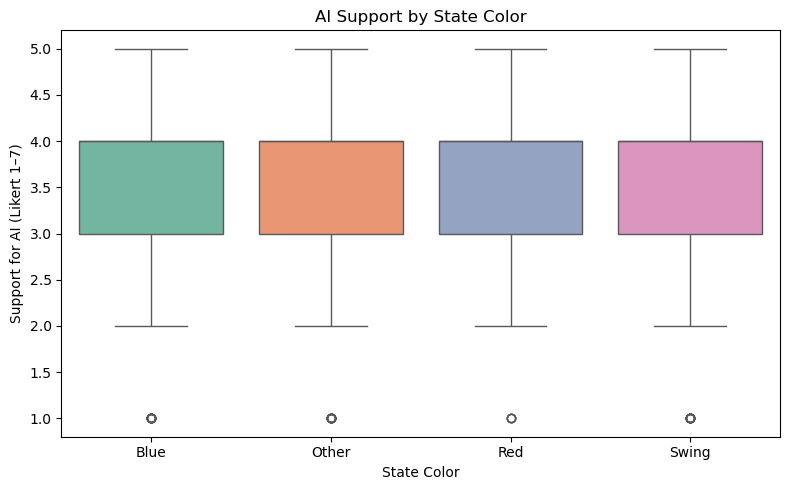

In [98]:
# Relationship between AI Support and State Color
plt.figure(figsize=(8, 5))
sns.boxplot(x='State_Color', y='AI_Support', data=df_subset, palette='Set2')
plt.title('AI Support by State Color')
plt.xlabel('State Color')
plt.ylabel('Support for AI (Likert 1–7)')
plt.tight_layout()
plt.show()

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_68977/1125028070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State_Color', y='AI_Trust', data=df, palette='Set2')


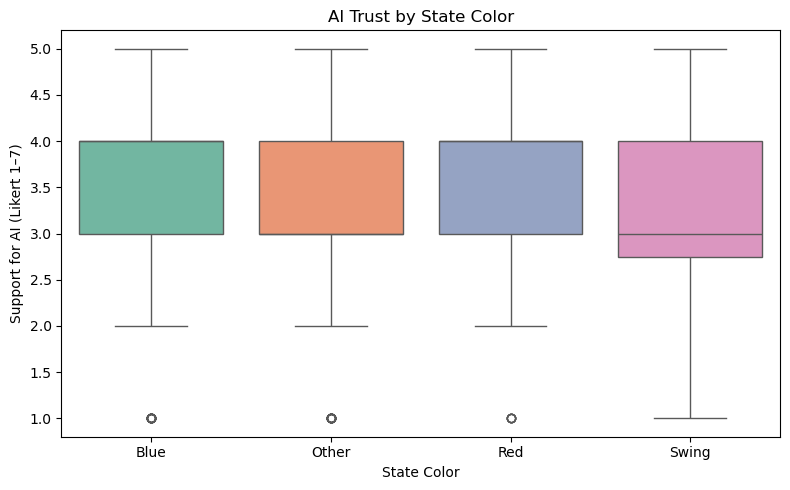

In [99]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='State_Color', y='AI_Trust', data=df, palette='Set2')
plt.title('AI Trust by State Color')
plt.xlabel('State Color')
plt.ylabel('Support for AI (Likert 1–7)')
plt.tight_layout()
plt.show()

In [100]:
model = smf.ols('AI_Support ~ Democrat * State_Color + Ideology + AI_Utility + Tech_Efficacy', data=df_subset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             AI_Support   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     48.10
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           2.74e-78
Time:                        16:47:06   Log-Likelihood:                -1328.7
No. Observations:                 994   AIC:                             2679.
Df Residuals:                     983   BIC:                             2733.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     